In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [371]:
df = pd.read_csv("bankloan.csv")

In [372]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [373]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP.Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal.Loan           int64
Securities.Account      int64
CD.Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [375]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

In [376]:
df.duplicated().sum()

0

In [377]:
df = df.drop(columns=["ID", "ZIP.Code"], axis = 1)

In [378]:
df = df[df["Experience"]>0]

In [379]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [380]:
df['Personal.Loan'].value_counts(normalize=True)

Personal.Loan
0    0.903113
1    0.096887
Name: proportion, dtype: float64

In [381]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,4882.0,45.826506,11.155088,25.0,36.0,46.0,55.00,67.0
Experience,4882.0,20.605899,11.136704,1.0,11.0,21.0,30.00,43.0
Income,4882.0,73.870750,46.112752,8.0,39.0,64.0,98.00,224.0
Family,4882.0,2.386112,1.148222,1.0,1.0,2.0,3.00,4.0
CCAvg,4882.0,1.935412,1.745065,0.0,0.7,1.5,2.60,10.0
Education,4882.0,1.874846,0.839329,1.0,1.0,2.0,3.00,3.0
Mortgage,4882.0,56.844326,102.009136,0.0,0.0,0.0,101.75,635.0
Personal.Loan,4882.0,0.096887,0.295833,0.0,0.0,0.0,0.00,1.0
Securities.Account,4882.0,0.104056,0.305364,0.0,0.0,0.0,0.00,1.0
CD.Account,4882.0,0.061450,0.240179,0.0,0.0,0.0,0.00,1.0


<Axes: xlabel='Personal.Loan', ylabel='count'>

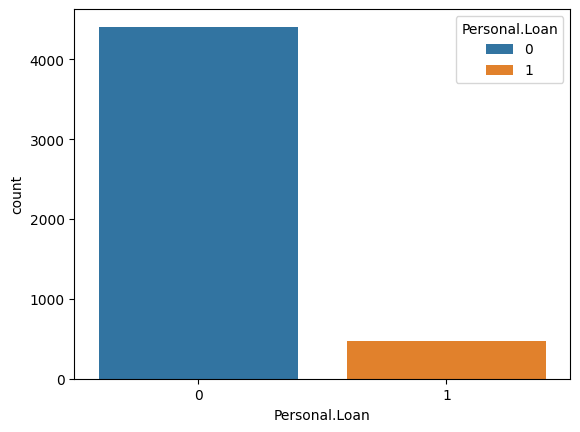

In [382]:
sns.countplot(x="Personal.Loan", data=df, hue ="Personal.Loan")

<Axes: xlabel='Age'>

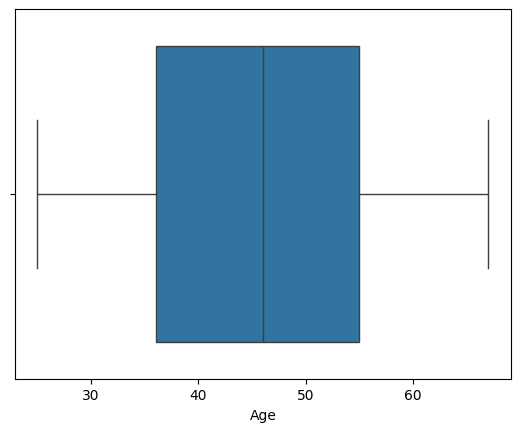

In [383]:
sns.boxplot(x="Age", data=df)

<Axes: xlabel='Experience'>

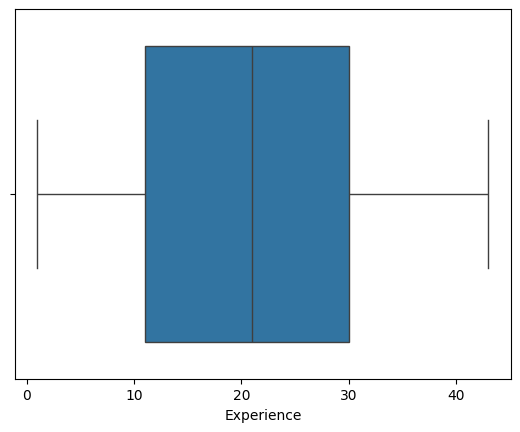

In [384]:
sns.boxplot(x="Experience", data=df)

<Axes: xlabel='Mortgage'>

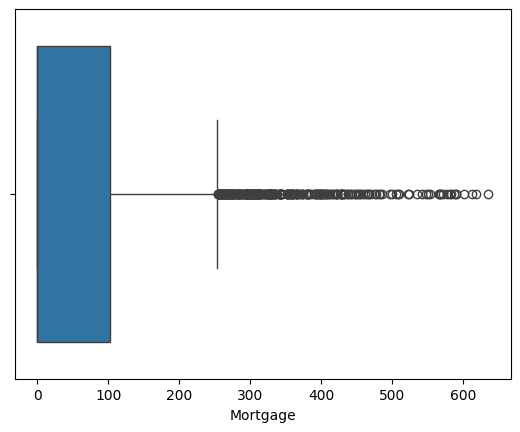

In [385]:
sns.boxplot(x="Mortgage", data=df)

<Axes: xlabel='CCAvg'>

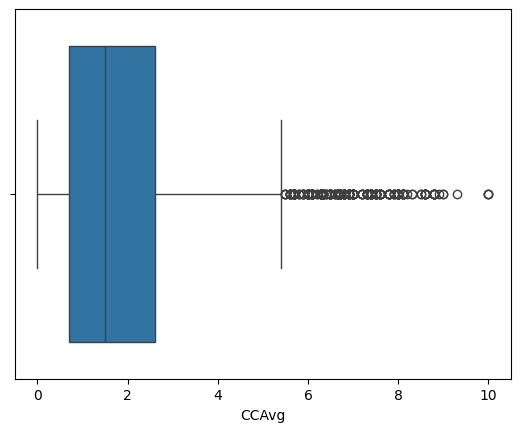

In [386]:
sns.boxplot(x="CCAvg", data=df)

<Axes: xlabel='Income'>

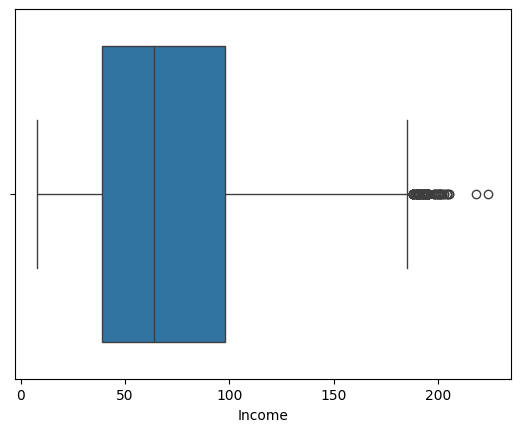

In [387]:
sns.boxplot(x="Income", data=df)

In [388]:
df.skew()

Age                  -0.018487
Experience           -0.007650
Income                0.840890
Family                0.165702
CCAvg                 1.592008
Education             0.239041
Mortgage              2.102545
Personal.Loan         2.726390
Securities.Account    2.594323
CD.Account            3.653356
Online               -0.402976
CreditCard            0.899520
dtype: float64

In [389]:
df["Mortgage"] = np.sqrt(df["Mortgage"])
df["CCAvg"] = np.sqrt(df["CCAvg"])
df["Income"] = np.sqrt(df["Income"])

<Axes: xlabel='Mortgage'>

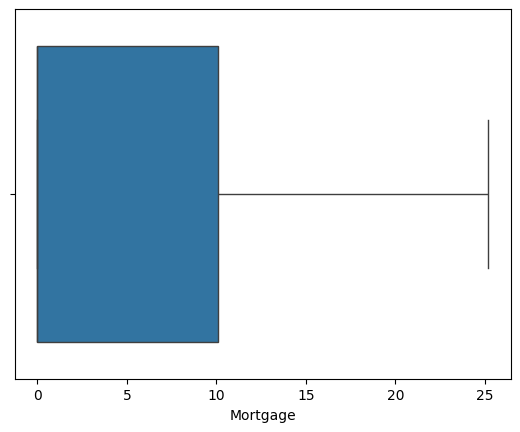

In [390]:
sns.boxplot(x="Mortgage", data=df)

<Axes: xlabel='Income'>

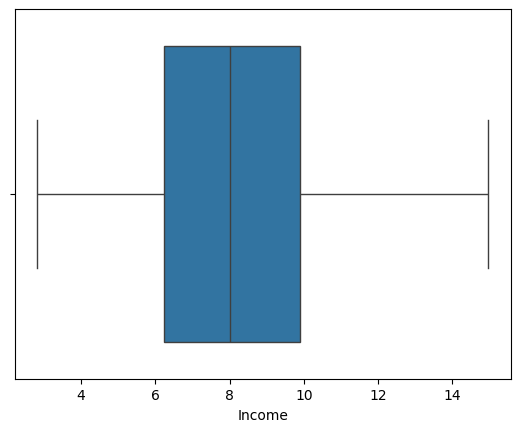

In [391]:
sns.boxplot(x="Income", data=df)

<Axes: xlabel='CCAvg'>

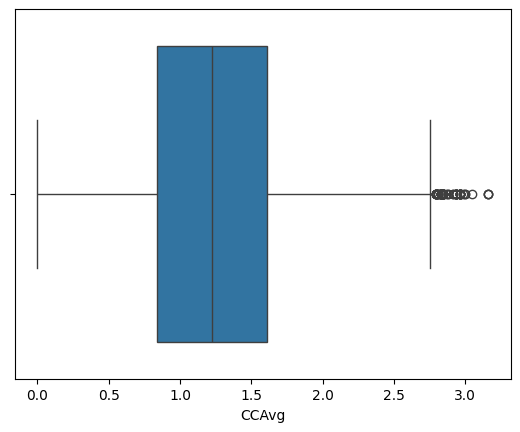

In [392]:
sns.boxplot(x="CCAvg", data=df)

In [393]:
q1 = df["CCAvg"].quantile(0.25)
q3 = df["CCAvg"].quantile(0.75)
iqr = q3 - q1
low = q1 - (1.5*iqr)
high = q3 + (1.5*iqr)

df = df[df["CCAvg"]<=high]

In [394]:
df.loc[df["CCAvg"]>=high] = high

<Axes: xlabel='CCAvg'>

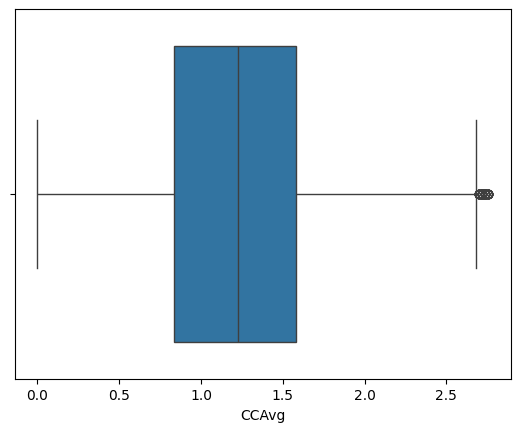

In [395]:
sns.boxplot(x="CCAvg", data=df)

<Axes: >

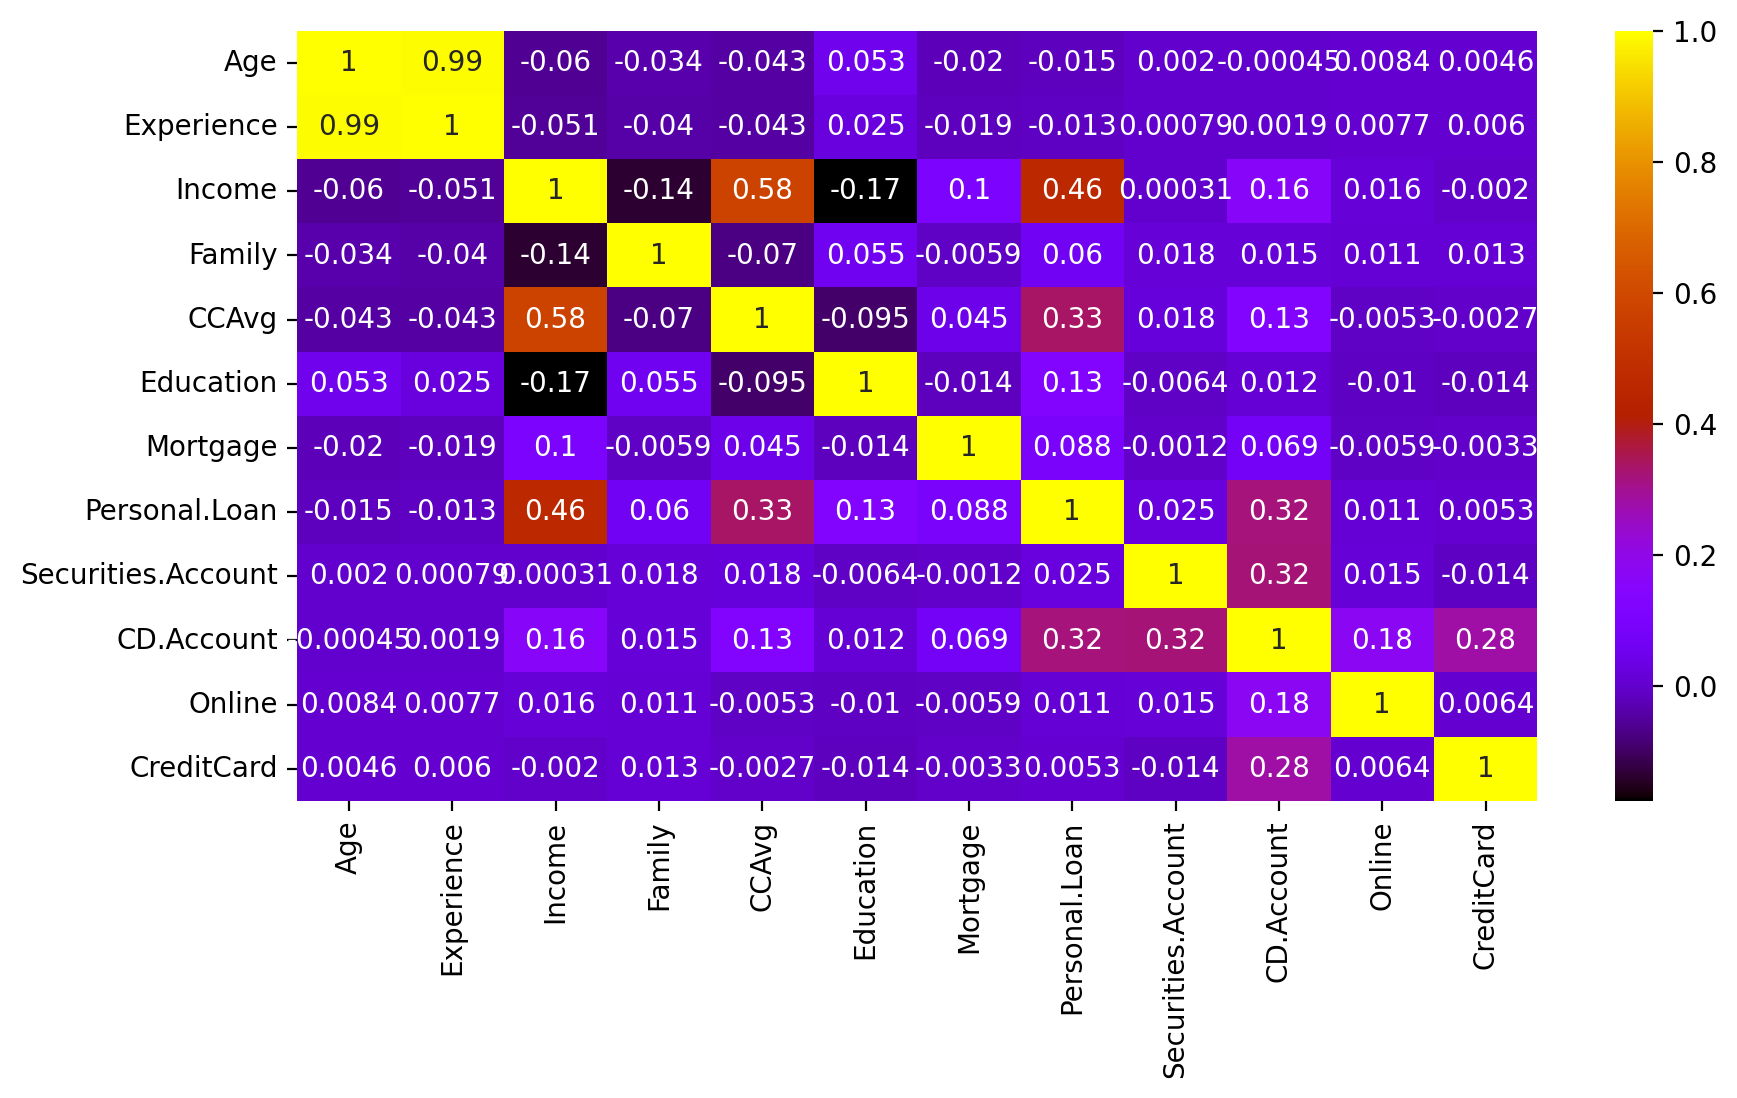

In [396]:
plt.figure(figsize=(10,5),dpi=200)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='gnuplot')

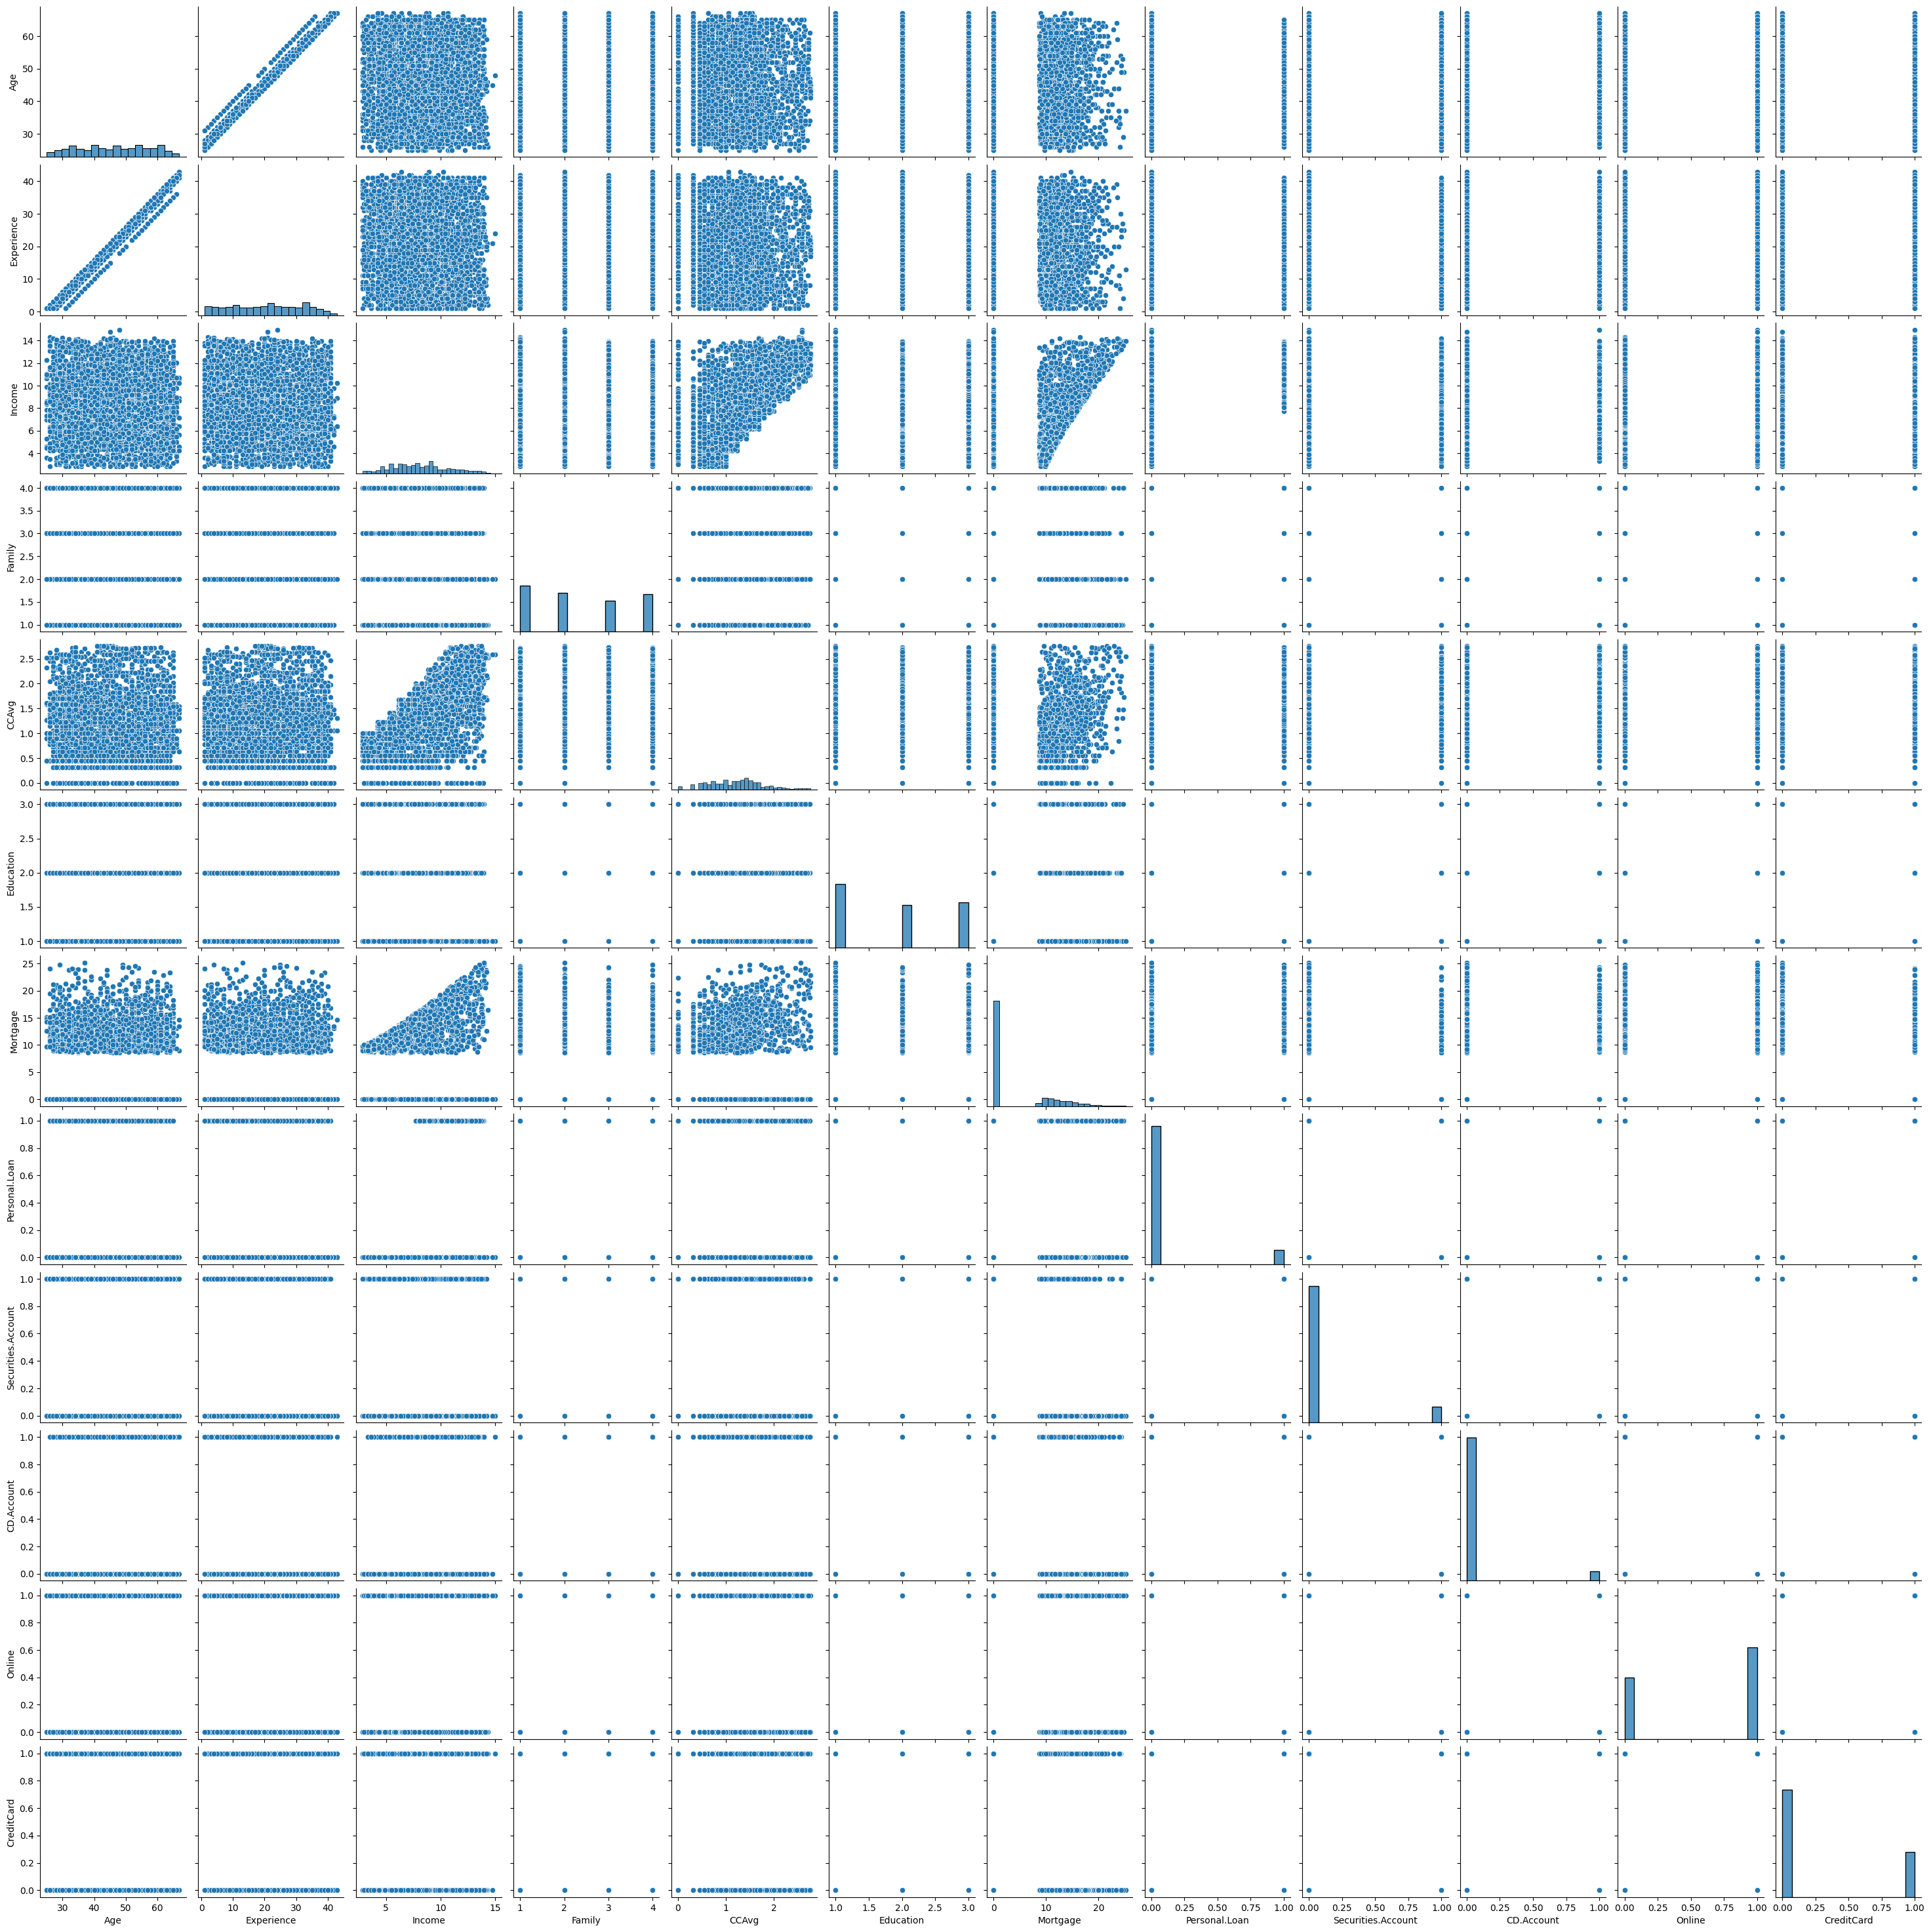

In [397]:
sns.pairplot(df)

In [398]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,7.000000,4,1.264911,1,0.0,0,1,0,0,0
1,45,19,5.830952,3,1.224745,1,0.0,0,1,0,0,0
2,39,15,3.316625,1,1.000000,1,0.0,0,0,0,0,0
3,35,9,10.000000,1,1.643168,2,0.0,0,0,0,0,0
4,35,8,6.708204,4,1.000000,2,0.0,0,0,0,0,1


In [399]:
df["Personal.Loan"].value_counts(normalize=True)

Personal.Loan
0    0.906185
1    0.093815
Name: proportion, dtype: float64

In [400]:
major = df[df["Personal.Loan"]==0]
minor = df[df["Personal.Loan"]==1]

In [401]:
minor_upsampled = minor.sample(n=len(major), replace=True)

In [402]:
df = pd.concat([major, minor_upsampled])

In [403]:
df["Personal.Loan"].value_counts(normalize=True)

Personal.Loan
0    0.5
1    0.5
Name: proportion, dtype: float64

In [404]:
df = df.sample(frac=1).reset_index(drop=True)

In [405]:
df["Personal.Loan"].value_counts(normalize=True)

Personal.Loan
0    0.5
1    0.5
Name: proportion, dtype: float64

In [406]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [407]:
y = df["Personal.Loan"]
X = df.copy()
X = X.drop(columns=["Personal.Loan"])

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [409]:
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

# Binary Logistic Regression

In [410]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [411]:
clf = LogisticRegression().fit(X_train, y_train)

In [412]:
y_pred = clf.predict(X_test)
print("precision : " + str(precision_score(y_test, y_pred)))
print("recall : " + str(recall_score(y_test, y_pred)))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("f1 : " + str(f1_score(y_test, y_pred)))

precision : 0.9297619047619048
recall : 0.8854875283446711
accuracy : 0.9084144247281053
f1 : 0.9070847851335656


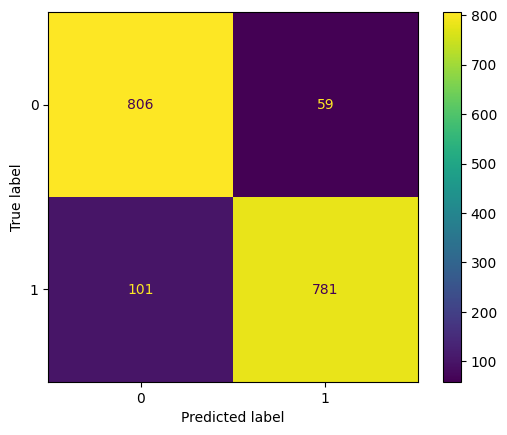

In [413]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= clf.classes_).plot()

In [414]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       865
           1       0.93      0.89      0.91       882

    accuracy                           0.91      1747
   macro avg       0.91      0.91      0.91      1747
weighted avg       0.91      0.91      0.91      1747



# Gaussian Naive Bayes

In [415]:
y = df["Personal.Loan"]
X = df.copy()
X = X.drop(columns=["Personal.Loan"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

In [416]:
from sklearn.naive_bayes import GaussianNB

In [417]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("precision : " + str(precision_score(y_test, y_pred)))
print("recall : " + str(recall_score(y_test, y_pred)))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("f1 : " + str(f1_score(y_test, y_pred)))

precision : 0.8654060066740823
recall : 0.9004629629629629
accuracy : 0.8815111619919863
f1 : 0.8825865002836075


In [418]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       883
           1       0.87      0.90      0.88       864

    accuracy                           0.88      1747
   macro avg       0.88      0.88      0.88      1747
weighted avg       0.88      0.88      0.88      1747



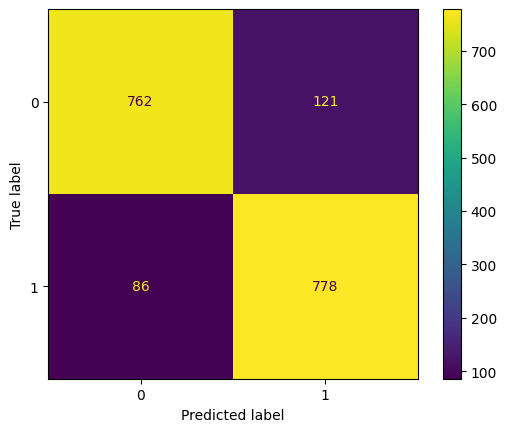

In [419]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= clf.classes_).plot()

# Decision Tree

In [420]:
%%time
y = df["Personal.Loan"]
X = df.copy()
X = X.drop(columns=["Personal.Loan"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier()
tree_params = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_leaf' : [2,3,5,7,9],
    'min_samples_split' : [2, 3, 4, 8, 7]
}
scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}
cv_instance = GridSearchCV(dt, tree_params, scoring=scoring, cv=5, refit='f1').fit(X_train, y_train)
cv_instance.best_estimator_

CPU times: total: 11.3 s
Wall time: 11.7 s


DecisionTreeClassifier(max_depth=7, min_samples_leaf=2)

In [424]:
cv_instance.best_params_

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [425]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=2).fit(X_train, y_train)

In [428]:
y_pred = dt.predict(X_test)
print("precision : " + str(precision_score(y_test, y_pred)))
print("recall : " + str(recall_score(y_test, y_pred)))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("f1 : " + str(f1_score(y_test, y_pred)))

precision : 0.9788182831661093
recall : 1.0
accuracy : 0.9891242129364625
f1 : 0.9892957746478873


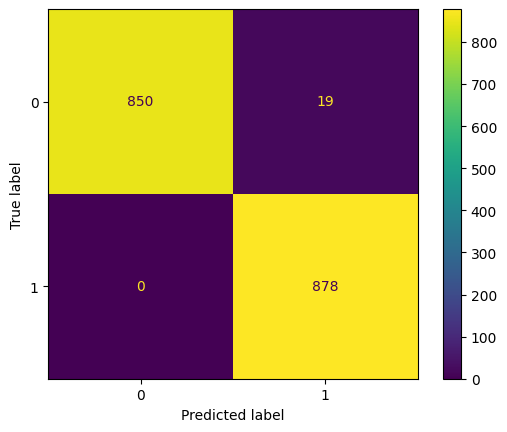

In [431]:
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_).plot()

In [432]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       869
           1       0.98      1.00      0.99       878

    accuracy                           0.99      1747
   macro avg       0.99      0.99      0.99      1747
weighted avg       0.99      0.99      0.99      1747



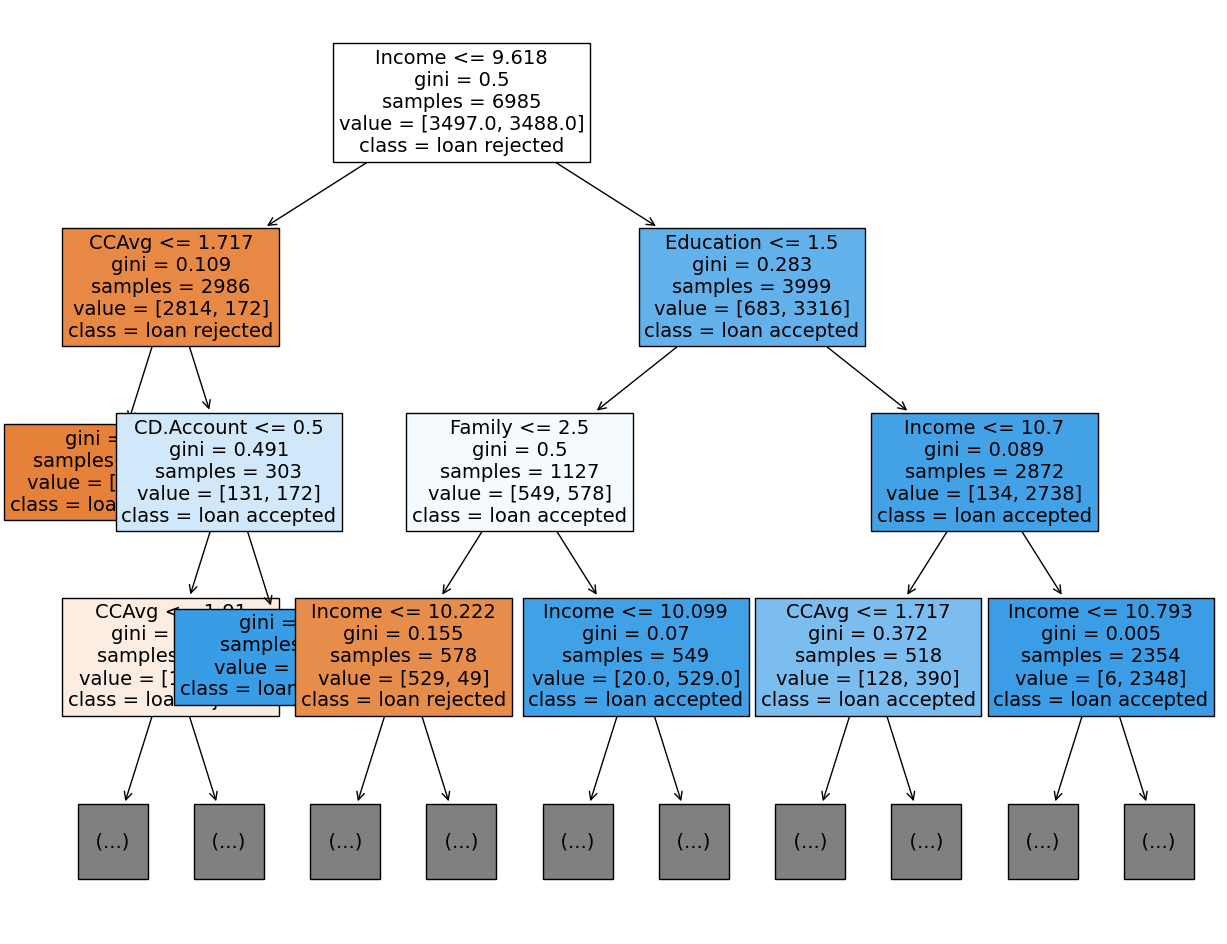

In [437]:
plt.figure(figsize=(15,12))
plot_tree(dt, max_depth=3, feature_names=X.columns, class_names={0:'loan rejected', 1 : 'loan accepted'}, filled=True, fontsize=14);

# Random forest

In [438]:
y = df["Personal.Loan"]
X = df.copy()
X = X.drop(columns=["Personal.Loan"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [439]:
from sklearn.ensemble import RandomForestClassifier

In [446]:
%%time
rf = RandomForestClassifier()

rf_params = {
    'n_estimators' : [10,20,30,40],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5,6],
    'min_samples_leaf' : [1,2,3,4,5],
    'max_features' : [1.0, 0.5, 0.3]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

cv_instance = GridSearchCV(rf, rf_params, scoring=scoring, cv=5, refit='f1').fit(X_train, y_train)

CPU times: total: 13min 34s
Wall time: 13min 46s


In [447]:
cv_instance.best_params_

{'max_depth': 7,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 40}

In [448]:
rf = RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=3, n_estimators=40, max_features=0.5).fit(X_train, y_train)

In [449]:
y_pred = rf.predict(X_test)
print("precision : " + str(precision_score(y_test, y_pred)))
print("recall : " + str(recall_score(y_test, y_pred)))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("f1 : " + str(f1_score(y_test, y_pred)))

precision : 0.9753363228699552
recall : 1.0
accuracy : 0.9874069834001145
f1 : 0.9875141884222475


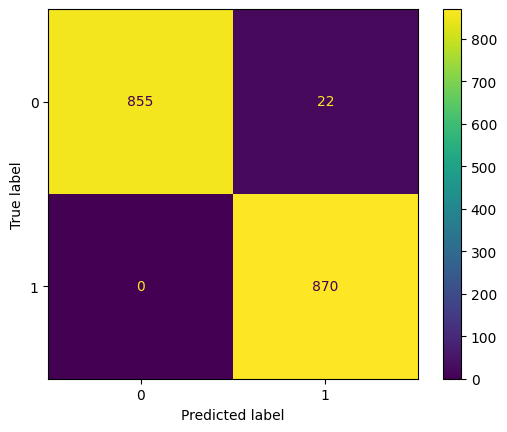

In [450]:
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()

In [451]:
import pickle
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

with open('rf_model.pkl', 'rb') as file:
    rf = pickle.load(file)

# XGBoost

In [452]:
from xgboost import XGBClassifier

In [453]:
%%time
xgb = XGBClassifier()
xgb_params = {
    'n_estimators' : [10,20,30,40],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5,6],
    'min_samples_leaf' : [1,2,3,4,5],
    'max_features' : [1.0, 0.5, 0.3]
}

scoring = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1'
}

cv_instance = GridSearchCV(xgb, xgb_params, scoring=scoring, cv=5, refit='f1').fit(X_train, y_train)

CPU times: total: 41min 15s
Wall time: 11min 58s


In [457]:
with open('cv_instance.pkl', 'wb') as file:
    pickle.dump(cv_instance, file)

In [458]:
with open("cv_instance.pkl", 'rb') as file:
    cv_instance = pickle.load(file)

In [460]:
cv_instance.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 40}

In [461]:
cv_instance.best_score_

0.9951619602631272

In [462]:
y_pred = cv_instance.best_estimator_.predict(X_test)

In [463]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       877
           1       0.99      1.00      0.99       870

    accuracy                           0.99      1747
   macro avg       0.99      0.99      0.99      1747
weighted avg       0.99      0.99      0.99      1747

